<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica7/Practica7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[# Link a repositorio de Github](https://github.com/mmarin11/Colabfiles/blob/main/Practica7/Practica7.ipynb)

# Carga y exploración

In [41]:
# 1) Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 2) Cargar dataset (Iris desde seaborn)
df = sns.load_dataset('iris')

# 3) Exploración básica
print("=== Primeras filas (head) ===")
display(df.head())

print("\n=== Información general (info) ===")
df.info()

print("\n=== Descriptivos numéricos (describe) ===")
display(df.describe(include='all'))

print("\n=== Valores nulos por columna ===")
display(df.isna().sum())


=== Primeras filas (head) ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



=== Información general (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

=== Descriptivos numéricos (describe) ===


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN



=== Valores nulos por columna ===


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# Grafica de barras

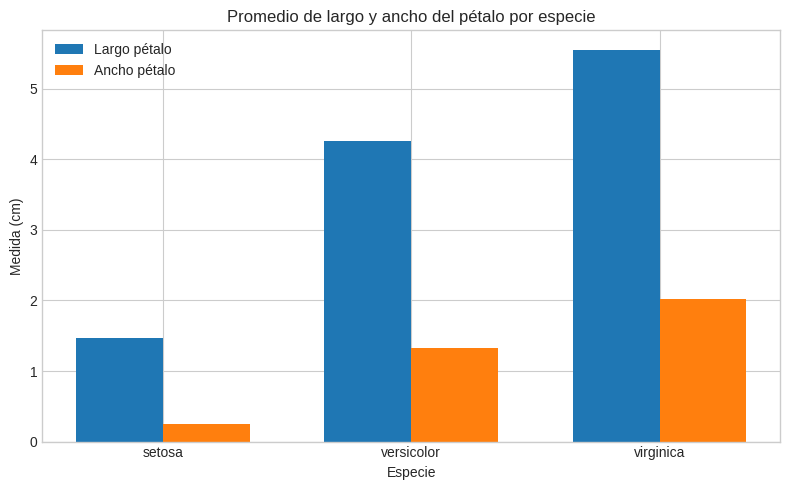

In [39]:

grouped = df.groupby('species')[['petal_length', 'petal_width']].mean()

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(grouped.index))
w = 0.35

ax.bar(x - w/2, grouped['petal_length'], width=w, label='Largo pétalo')
ax.bar(x + w/2, grouped['petal_width'],  width=w, label='Ancho pétalo')

ax.set_title('Promedio de largo y ancho del pétalo por especie')
ax.set_xlabel('Especie')
ax.set_ylabel('Medida (cm)')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.legend()
plt.tight_layout()
plt.show()

# Histograma

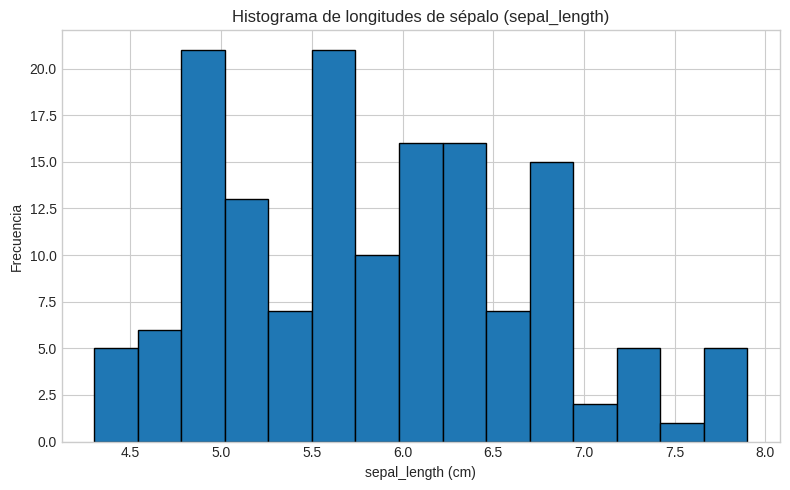

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df['sepal_length'], bins=15, edgecolor='black')
ax.set_title('Histograma de longitudes de sépalo (sepal_length)')
ax.set_xlabel('sepal_length (cm)')
ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica de dispersión

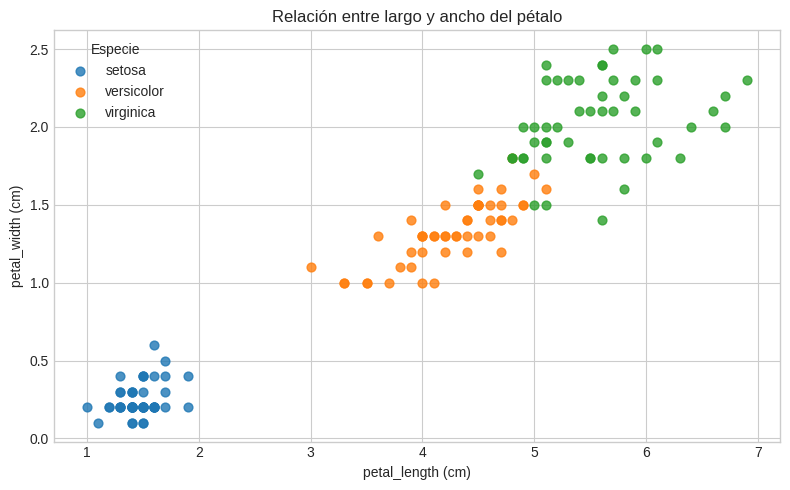

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = {'setosa': '#1f77b4', 'versicolor': '#ff7f0e', 'virginica': '#2ca02c'}

for specie, sub in df.groupby('species'):
    ax.scatter(sub['petal_length'], sub['petal_width'],
               s=40, alpha=0.8, label=specie, color=colors[specie])

ax.set_title('Relación entre largo y ancho del pétalo')
ax.set_xlabel('petal_length (cm)')
ax.set_ylabel('petal_width (cm)')
ax.legend(title='Especie')
plt.tight_layout()
plt.show()

# Gráfico de cajas

Text(0, 0.5, 'sepal_width (cm)')

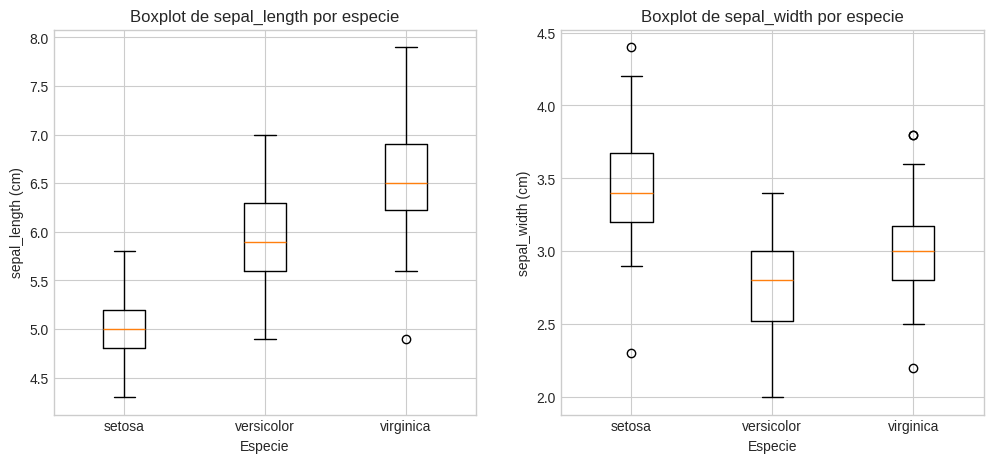

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Boxplot sepal_length por especie
data_len = [df[df['species']==sp]['sepal_length'] for sp in df['species'].unique()]
axes[0].boxplot(data_len, tick_labels=df['species'].unique())
axes[0].set_title('Boxplot de sepal_length por especie')
axes[0].set_xlabel('Especie')
axes[0].set_ylabel('sepal_length (cm)')

# Boxplot sepal_width por especie
data_wid = [df[df['species']==sp]['sepal_width'] for sp in df['species'].unique()]
axes[1].boxplot(data_wid, tick_labels=df['species'].unique())
axes[1].set_title('Boxplot de sepal_width por especie')
axes[1].set_xlabel('Especie')
axes[1].set_ylabel('sepal_width (cm)')

# Gráfica de lineas


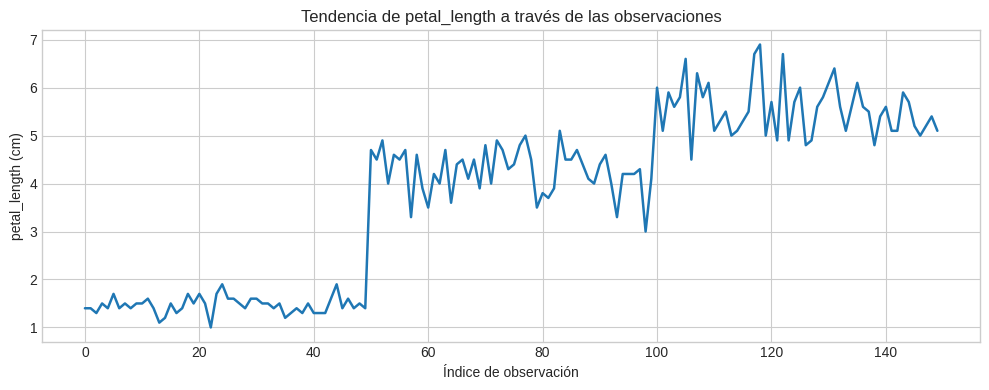

In [45]:


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.index, df['petal_length'], linewidth=1.8)
ax.set_title('Tendencia de petal_length a través de las observaciones')
ax.set_xlabel('Índice de observación')
ax.set_ylabel('petal_length (cm)')
plt.tight_layout()
plt.show()

